# 3. Práctica: Vectores a palabras

**Fecha de entrega: 19 de Marzo de 2025 @ 11:59pm**



In [ ]:
#!jupytext --set-formats ipynb,py 03_vectores_a_palabras.ipynb

[jupytext] Reading 03_vectores_a_palabras.ipynb in format ipynb
[jupytext] Updating notebook metadata with '{"jupytext": {"formats": "ipynb,py"}}'
[jupytext] Updating 03_vectores_a_palabras.ipynb
[jupytext] Updating 03_vectores_a_palabras.py


## 1er ejercicio

Obtenga la matriz de co-ocurrencia para un corpus en español y realice los siguientes calculos:

- Las probabilidades conjuntas
$$p(w_i,w_j) = \frac{c_{i,j}}{\sum_i \sum_j c_{i,j}}$$
- Las probabilidades marginales
$$p(w_i) = \sum_j p(w_i,w_j)$$
- Positive Point Wise Mutual Information (PPMI):
$$PPMI(w_i,w_j) = \max\{0, \log_2 \frac{p(w_i,w_j)}{p(w_i)p(w_j)}\}$$

Utilizare el corpus en NLTK EUROPARL que incluye textos oficiales del Parlamento Europeo traducidos en varios idiomas, incluyendo el espanol

In [86]:
# Bibliotecas
import nltk
from nltk.corpus import europarl_raw
import numpy as np
from itertools import combinations
import pandas as pd
import string
from sklearn.decomposition import PCA



In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Descargar corpus en español
nltk.download("europarl_raw")
europarl_esp = europarl_raw.spanish.raw()

[nltk_data] Downloading package europarl_raw to
[nltk_data]     C:\Users\diana\AppData\Roaming\nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!


In [27]:
europarl_esp[:100] # Esta por letras

' \nReanudación del período de sesiones Declaro reanudado el período de sesiones del Parlamento Europe'

In [28]:
# Convertimos a oraciones
europarl_sentences = europarl_esp.split("\n")
europarl_sentences[:5]

[' ',
 'Reanudación del período de sesiones Declaro reanudado el período de sesiones del Parlamento Europeo , interrumpido el viernes 17 de diciembre pasado , y reitero a Sus Señorías mi deseo de que hayan tenido unas buenas vacaciones .',
 'Como todos han podido comprobar , el gran " efecto del año 2000 " no se ha producido .',
 'En cambio , los ciudadanos de varios de nuestros países han sido víctimas de catástrofes naturales verdaderamente terribles .',
 'Sus Señorías han solicitado un debate sobre el tema para los próximos días , en el curso de este período de sesiones .']

### Obtener matriz de co-ocurrencia

In [29]:
def preprocess_text(text: str) -> list[str]:
    """
    Preprocesa el texto eliminando puntuación, convirtiendo a minúsculas y eliminando stopwords.

    Parameters
    ----------
    text : str
        Una cadena de texto en español.

    Returns
    -------
    list[str]
        Lista de palabras tokenizadas y filtradas.
    """
   
    stop_words = set(stopwords.words("spanish"))
    # Elimina puntuación
    text = text.lower().translate(str.maketrans('', '', string.punctuation))  
    # Tokeniza por espacios 
    tokens = text.split()  
    # Filtrar stop words
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words] 
    return tokens

In [30]:

def get_cooccurrence_matrix(sentences: list[list[str]], indices: dict[str, int]) -> np.ndarray:
    """
    Genera una matriz de co-ocurrencia basada en un corpus de oraciones en español.

    Parameters
    ----------
    sentences : list[list[str]]
        Lista de listas, donde cada lista contiene las palabras de una oración.
    indices : dict[str, int]
        Diccionario que asigna un índice único a cada palabra en el corpus.

    Returns
    -------
    np.ndarray
        Matriz cuadrada de co-ocurrencia donde cada celda (i, j) representa la frecuencia de co-ocurrencia de las palabras.
    """
    # Inicializamos la matriz vacias
    matrix = np.zeros((len(indices), len(indices)), dtype=np.float32)  
    for sent in sentences:
        # Combinamos cada palabra con las palabras en la misma oración
        for term1, term2 in combinations(sent, 2):  
            if term1 in indices and term2 in indices:
                matrix[indices[term1], indices[term2]] += 1
                matrix[indices[term2], indices[term1]] += 1  
    return matrix


In [31]:
# Preprocesamos las oraciones
corpus_tokenized = [preprocess_text(sentence) for sentence in europarl_sentences]

# Creamos un diccionario de índices para las palabras únicas
unique_words = set(word for sentence in corpus_tokenized for word in sentence)
word_indices = {word: i for i, word in enumerate(unique_words)}

# Calculamos la matriz de co-ocurrencia
cooc_matrix = get_cooccurrence_matrix(corpus_tokenized, word_indices)

# Convertimos a DataFrame 
df_cooc = pd.DataFrame(cooc_matrix, index=word_indices.keys(), columns=word_indices.keys())

df_cooc

,arizona,establecería,imponernos,rompió,schulz,desaparecería,ariadna,subsuelo,pluralistas,modificarse,...,casco,acudiremos,lamentaría,sostenibles,retrasando,ulster,acarrear,brete,niza,colocado
arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
establecería,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imponernos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rompió,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
schulz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ulster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acarrear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brete,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
niza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Ver el conteo de sesiones con declaro
cooc_matrix[word_indices["sesiones"],word_indices["declaro"]]

9.0

### Probabilidades conjuntas

In [33]:
def compute_joint_probabilities(matrix: np.ndarray) -> np.ndarray:
    """
    Calcula la matriz de probabilidades conjuntas p(w_i, w_j).

    Parameters
    ----------
    matrix : np.ndarray
        Matriz de co-ocurrencia donde cada celda (i, j) representa
        la frecuencia de co-ocurrencia de las palabras.

    Returns
    -------
    np.ndarray
        Matriz de probabilidades conjuntas p(w_i, w_j).
    """
    # Suma total de co-ocurrencias
    total_cooccurrences = np.sum(matrix) 
     
    if total_cooccurrences == 0:
         # Evita división por cero si la matriz está vacía
        return np.zeros_like(matrix) 
    
    # Normalizar
    return matrix / total_cooccurrences  

In [34]:
# Calcular la matriz de probabilidades conjuntas
conj_probs_matrix = compute_joint_probabilities(cooc_matrix)

# Convertir a DataFrame para visualización
df_conj_probs = pd.DataFrame(conj_probs_matrix, index=word_indices.keys(), columns=word_indices.keys())

df_conj_probs

,arizona,establecería,imponernos,rompió,schulz,desaparecería,ariadna,subsuelo,pluralistas,modificarse,...,casco,acudiremos,lamentaría,sostenibles,retrasando,ulster,acarrear,brete,niza,colocado
arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
establecería,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imponernos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rompió,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
schulz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ulster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acarrear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brete,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
niza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Ver la probabilidad conjunta de sesiones con declaro
conj_probs_matrix[word_indices["sesiones"],word_indices["declaro"]]

1.7592467e-06

### Probabilidades marginales

In [36]:
def compute_marginal_probabilities(joint_matrix: np.ndarray) -> np.ndarray:
    """
    Calcula las probabilidades marginales p(w_i) sumando sobre todas las columnas.

    Parameters
    ----------
    joint_matrix : np.ndarray
        Matriz de probabilidades conjuntas p(w_i, w_j).

    Returns
    -------
    np.ndarray
        Vector con las probabilidades marginales p(w_i).
    """
    # Suma a lo largo de las columnas de la matriz de probas conjuntas
    return np.sum(joint_matrix, axis=1)  

In [37]:
# Calcular probabilidades marginales
marginal_probs = compute_marginal_probabilities(conj_probs_matrix)

df_marginal_prob = pd.DataFrame(marginal_probs, index=word_indices.keys(), columns=["p(w)"])

df_marginal_prob

,p(w)
arizona,0.000006
establecería,0.000006
imponernos,0.000004
rompió,0.000002
schulz,0.000013
...,...
ulster,0.000006
acarrear,0.000001
brete,0.000003
niza,0.000009


### PPMI

In [38]:
def compute_ppmi(joint_matrix: np.ndarray, marginal_probs: np.ndarray) -> np.ndarray:
    """
    Calcula la matriz de Positive Pointwise Mutual Information (PPMI).

    Parameters
    ----------
    joint_matrix : np.ndarray
        Matriz de probabilidades conjuntas p(w_i, w_j).
    marginal_probs : np.ndarray
        Vector con las probabilidades marginales p(w_i).

    Returns
    -------
    np.ndarray
        Matriz de PPMI donde cada celda (i, j) representa PPMI(w_i, w_j).
    """
    # Crear matriz PPMI con ceros
    ppmi_matrix = np.zeros_like(joint_matrix)

    # Iterar sobre cada par de palabras
    for i in range(joint_matrix.shape[0]):
        for j in range(joint_matrix.shape[1]):
            if joint_matrix[i, j] > 0:  # Evitar problemas con log(0)
                p_wi_wj = joint_matrix[i, j]
                p_wi = marginal_probs[i]
                p_wj = marginal_probs[j]

                # Calcular PMI y aplicar max(0, PMI)
                ppmi_matrix[i, j] = max(0, np.log2(p_wi_wj / (p_wi * p_wj)))

    return ppmi_matrix

La siguiente celda tarda aproximadamente 10 minutos en correr

In [39]:
# Calcular la matriz de PPMI 
ppmi_matrix = compute_ppmi(conj_probs_matrix, marginal_probs)

df_ppmi = pd.DataFrame(ppmi_matrix, index=word_indices.keys(), columns=word_indices.keys())

In [40]:
df_ppmi

,arizona,establecería,imponernos,rompió,schulz,desaparecería,ariadna,subsuelo,pluralistas,modificarse,...,casco,acudiremos,lamentaría,sostenibles,retrasando,ulster,acarrear,brete,niza,colocado
arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
establecería,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imponernos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rompió,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
schulz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ulster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acarrear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brete,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
niza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2do ejercicio

## **Comparación de representaciones**

Aplica reducción de dimensionalidad (a 2D) de los vectores de la matríz con PPMI y de los vectores entrenados en español:

- Realiza un plot de 100 vectores aleatorios (que esten tanto en la matríz como en los vectores entrenados)
- Compara los resultados de los plots:
    - ¿Qué representación dirías que captura mejor relaciones semánticas?
    - Realiza un cuadro comparativo de ambos métodos con ventajas/desventajas

### Reducción de dimensionalidad

In [41]:
def apply_pca(ppmi_matrix: np.ndarray, n_components: int = 2) -> np.ndarray:
    """
    Aplica PCA a la matriz PPMI para reducir la dimensionalidad a 2D.

    Parameters
    ----------
    ppmi_matrix : np.ndarray
        Matriz de PPMI donde cada fila representa una palabra como vector de características.
    n_components : int, optional
        Número de dimensiones a reducir, por defecto 2.

    Returns
    -------
    np.ndarray
        Matriz con las palabras proyectadas en el espacio 2D.
    """
    pca = PCA(n_components=n_components)
    return pca.fit_transform(ppmi_matrix)

In [42]:
ppmi_2d = apply_pca(ppmi_matrix)

df_2d = pd.DataFrame(ppmi_2d, index=word_indices.keys(),columns=["PC1","PC2"])

df_2d

,PC1,PC2
arizona,-2.546093,-0.566458
establecería,-2.625864,-0.331012
imponernos,-3.727324,-0.204946
rompió,-4.062230,-0.212143
schulz,-1.390517,-0.199034
...,...,...
ulster,-2.651916,0.628267
acarrear,-4.141145,-0.356389
brete,-3.526091,-0.699246
niza,-1.417943,0.416125


### Carga de modelos pre-entrenados

In [2]:
from gensim.models import word2vec

In [3]:
def load_model(model_path: str):
    try:
        print(model_path)
        return word2vec.Word2Vec.load(model_path)
    except:
        print(f"[WARN] Model not found in path {model_path}")
        return None

In [21]:
MODELS_DIR = "C:/Users/diana/OneDrive/Documentos/Escuela/Semestre 8/T.S_PLN/st-cl-2025-2-lab/practicas/dianasalgado22/P3/data/word2vec/"
print(MODELS_DIR)
model_name = "eswiki-md-300-CBOW.model"
model = load_model(MODELS_DIR + model_name)

C:/Users/diana/OneDrive/Documentos/Escuela/Semestre 8/T.S_PLN/st-cl-2025-2-lab/practicas/dianasalgado22/P3/data/word2vec/
C:/Users/diana/OneDrive/Documentos/Escuela/Semestre 8/T.S_PLN/st-cl-2025-2-lab/practicas/dianasalgado22/P3/data/word2vec/eswiki-md-300-CBOW.model


### Plot de 100 vectores aleatorios

In [45]:
# Hay que filtrar las palabras que estan en el modelo y en nuestra matriz
common_words = list(set(word_indices.keys()) & set(model.wv.key_to_index.keys()))

print("Cantidad de palabras en común: " ,len(common_words))

Cantidad de palabras en común:  17217


In [46]:
import random

In [49]:
# Seleccionar 100 palabras aleatorias
random.seed(123)
selected_words = random.sample(common_words, min(100, len(common_words)),)

print(f"Se seleccionaron {len(selected_words)} palabras en común.")

Se seleccionaron 100 palabras en común.


In [61]:
# Extraer los vectores de las 100 palabras seleccionadas 

# PPMI
ppmi_100 = np.array([ppmi_2d[word_indices[word]] for word in selected_words])

# word2vec
word2vec_100 = np.array([model.wv[word] for word in selected_words])

print("Vectores PPMI: \n", ppmi_100[:5])
print()
print("Vectores wor2vec \n", word2vec_100[:5])

Vectores PPMI: 
 [[-3.5834303  -0.40357232]
 [-4.206812   -0.18301076]
 [-2.5658104   0.02241046]
 [ 2.753682   -1.8557922 ]
 [-3.5007062  -0.4883238 ]]

Vectores wor2vec 
 [[ 0.01754544 -0.0505823  -0.01438302 ...  0.01318598 -0.03845266
  -0.02544523]
 [ 0.00713557 -0.02534311 -0.0048738  ... -0.04143535  0.01918063
  -0.02201546]
 [-0.00920774 -0.06217194 -0.05888858 ...  0.03232231  0.05535602
   0.00319985]
 [ 0.47593716  0.30180576  0.15800257 ...  0.22897136  0.1508904
  -0.1121368 ]
 [ 0.16486098  0.01908859 -0.09564611 ... -0.0512906  -0.11814757
  -0.03303415]]


Podemos notar que los vectores del modelo son de dimension mayor a 2, por los que hay que aplicarle una reducción también

In [63]:
# Aplicar PCA a Word2Vec
word2vec_100_2d = PCA(n_components=2).fit_transform(word2vec_100)

print("Vectores PPMI: \n", ppmi_100[:5])
print()
print("Vectores wor2vec 2d \n", word2vec_100_2d[:5])

Vectores PPMI: 
 [[-3.5834303  -0.40357232]
 [-4.206812   -0.18301076]
 [-2.5658104   0.02241046]
 [ 2.753682   -1.8557922 ]
 [-3.5007062  -0.4883238 ]]

Vectores wor2vec 2d 
 [[ 4.56749171e-01 -3.95332836e-02]
 [ 3.58650684e-01 -2.78280932e-03]
 [ 3.59048873e-01  1.00373894e-01]
 [-2.78378415e+00 -1.08612561e+00]
 [ 6.43344939e-01 -3.46934460e-02]]


In [72]:
# Calcular la distancia euclidiana entre cada palabra en ambos espacios
from scipy.spatial.distance import euclidean
word_differences = {
    word: euclidean(ppmi_100[i], word2vec_100_2d[i])
    for i, word in enumerate(selected_words)
}


# Seleccionar las 10 palabras con mayor diferencia
dif_top_10_words = sorted(word_differences, key=word_differences.get, reverse=True)[:10]

# Seleccionar las 10 palabras mas parecidas
eq_top_10_words = sorted(word_differences, key=word_differences.get)[:10]


In [82]:
print("Top 10 palabras con representaciones mas diferentes:")
dif_top_10_words

Top 10 palabras con representaciones mas diferentes:


['berger',
 'sistemas',
 'sabemos',
 'lado',
 'prevención',
 'ocasión',
 'tierra',
 'fraude',
 'hará',
 'mantiene']

In [ ]:
print("Top 10 palabras con representaciones mas parecidas:")
eq_top_10_words

Top 10 palabras con representaciones mas parecidas:


['coyuntura',
 'obligadas',
 'calamidades',
 'radiaciones',
 'eficientes',
 'incompatible',
 'enfatizar',
 'recoja',
 'proveedor',
 'inconcebible']

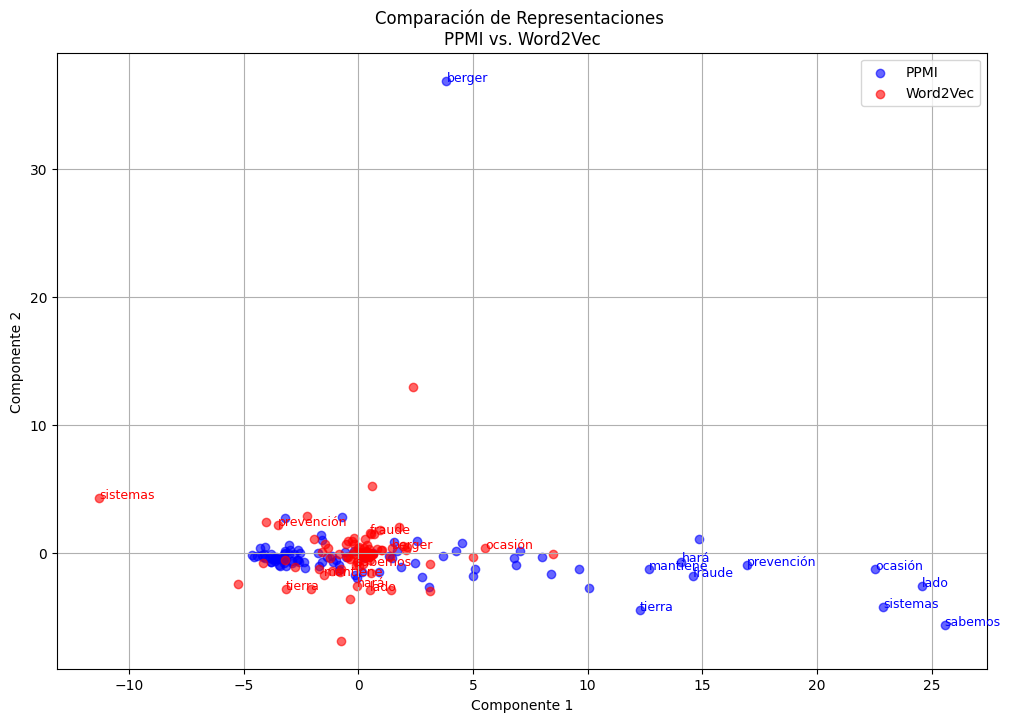

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Graficar los vectores de PPMI
plt.scatter(ppmi_100[:, 0], ppmi_100[:, 1], color='blue', label="PPMI", alpha=0.6)

# Graficar los vectores de Word2Vec
plt.scatter(word2vec_100_2d[:, 0], word2vec_100_2d[:, 1], color='red', label="Word2Vec", alpha=0.6)

# Agregar etiquetas en las 10 representaciones mas distintas
for word in dif_top_10_words:
    i = selected_words.index(word)  # Obtener el índice en selected_words
    plt.text(ppmi_100[i, 0], ppmi_100[i, 1], word, fontsize=9, color='blue')
    plt.text(word2vec_100_2d[i, 0], word2vec_100_2d[i, 1], word, fontsize=9, color='red')


plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Comparación de Representaciones \nPPMI vs. Word2Vec")
plt.legend()
plt.grid()
plt.show()

### Conclusiones

**¿Qué representación dirías que captura mejor relaciones semánticas?**

Podemos notar que PPMI y Word2Vec representan las palabras de manera muy distinta. En particular, palabras como "berger", "sistemas" y "prevención" aparecen en posiciones muy diferentes e incluso opuestas en la gráfica, lo que sugiere que cada método organiza el espacio semántico de manera diferente.

También se observa que las representaciones de Word2Vec son más compactas, mientras que PPMI tiende a dispersar más las palabras en el espacio. Esta diferencia sugiere que Word2Vec agrupa mejor las palabras con significados similares, mientras que PPMI las distribuye de acuerdo con la co-ocurrencia en el corpus.

Dado que nuestro corpus está enfocado en un tema muy específico (leyes, derechos, parlamentos, etc.), se esperaría que las palabras relacionadas estén cercanas en el espacio semántico. En este caso, Word2Vec representa mejor las relaciones semánticas, ya que captura patrones de contexto más amplios en lugar de depender únicamente de la co-ocurrencia directa como lo hace PPMI.



**Cuadro comparativo**

![image](Cuadro_comparativo.png)